In [ ]:
# Libraries
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for seaborn
sns.set(style="whitegrid")

In [ ]:
def import_json_to_dataframes(directory, filenames):
    """
    Imports specified JSON files from a directory and stores them as DataFrames.

    Args:
        directory: The directory containing the JSON files.
        filenames: A list of filenames to import (without the .json extension).

    Returns:
        A dictionary where keys are filenames and values are the corresponding DataFrames.
    """

    dataframes = {}
    for filename in filenames:
        file_path = os.path.join(directory, f"{filename}.json")
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)

            items_data = data['_items']
            df = pd.json_normalize(items_data)

            meta_data = data['_meta']
            for key, value in meta_data.items():
                df[key] = value

            dataframes[filename] = df

        except FileNotFoundError:
            print(f"File not found: {file_path}")

    return dataframes

directory = "/content/drive/MyDrive/Colab/NU/CIVE7381/Project/"
filenames = ["jpl", "caltech"]

dataframes = import_json_to_dataframes(directory, filenames)

# Access the DataFrames
jpl_df = dataframes["jpl"]
caltech_df = dataframes["caltech"]

In [ ]:
jpl_df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,end,min_kWh,site,start
0,5c367215f9af8b4639a8f35f,0001,"Wed, 02 Jan 2019 01:00:51 GMT","Wed, 02 Jan 2019 02:39:46 GMT","Wed, 02 Jan 2019 02:39:37 GMT",10.143,1_1_193_829_2019-01-02 01:00:51.413435,0001,AG-1F03,1-1-193-829,America/Los_Angeles,000000362,"[{'WhPerMile': 286, 'kWhRequested': 34.32, 'mi...","Mon, 01 Apr 2019 19:04:00 GMT",None,jpl,"Mon, 31 Dec 2018 19:03:00 GMT"
1,5c367245f9af8b4639a8f360,0001,"Wed, 02 Jan 2019 13:39:11 GMT","Thu, 03 Jan 2019 01:19:57 GMT","Wed, 02 Jan 2019 15:37:12 GMT",5.871,1_1_191_789_2019-01-02 13:39:11.359003,0001,AG-4F52,1-1-191-789,America/Los_Angeles,000000483,"[{'WhPerMile': 350, 'kWhRequested': 10.15, 'mi...","Mon, 01 Apr 2019 19:04:00 GMT",None,jpl,"Mon, 31 Dec 2018 19:03:00 GMT"
2,5c367245f9af8b4639a8f361,0001,"Wed, 02 Jan 2019 13:44:27 GMT","Wed, 02 Jan 2019 22:37:33 GMT","Wed, 02 Jan 2019 19:18:16 GMT",12.094,1_1_178_823_2019-01-02 13:44:26.828039,0001,AG-1F08,1-1-178-823,America/Los_Angeles,000000406,"[{'WhPerMile': 500, 'kWhRequested': 20.0, 'mil...","Mon, 01 Apr 2019 19:04:00 GMT",None,jpl,"Mon, 31 Dec 2018 19:03:00 GMT"
3,5c367245f9af8b4639a8f362,0001,"Wed, 02 Jan 2019 13:47:38 GMT","Wed, 02 Jan 2019 19:01:31 GMT","Wed, 02 Jan 2019 15:06:07 GMT",2.425,1_1_193_829_2019-01-02 13:47:38.465648,0001,AG-1F03,1-1-193-829,America/Los_Angeles,000001117,"[{'WhPerMile': 400, 'kWhRequested': 4.0, 'mile...","Mon, 01 Apr 2019 19:04:00 GMT",None,jpl,"Mon, 31 Dec 2018 19:03:00 GMT"
4,5c367245f9af8b4639a8f363,0001,"Wed, 02 Jan 2019 13:53:41 GMT","Wed, 02 Jan 2019 21:40:03 GMT","Wed, 02 Jan 2019 16:45:46 GMT",14.331,1_1_193_819_2019-01-02 13:53:40.716472,0001,AG-1F06,1-1-193-819,America/Los_Angeles,000000651,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...","Mon, 01 Apr 2019 19:04:00 GMT",None,jpl,"Mon, 31 Dec 2018 19:03:00 GMT"


In [ ]:
caltech_df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,end,min_kWh,site,start
0,5c3fda9df9af8b0d99c6fd5a,0039,"Mon, 31 Dec 2018 19:37:01 GMT","Mon, 31 Dec 2018 21:34:08 GMT","Mon, 31 Dec 2018 21:34:04 GMT",1.135,2_39_138_29_2018-12-31 19:37:01.102684,0002,CA-304,2-39-138-29,America/Los_Angeles,None,None,"Mon, 01 Apr 2019 19:04:00 GMT",None,caltech,"Mon, 31 Dec 2018 19:03:00 GMT"
1,5c3fda9df9af8b0d99c6fd5b,0039,"Mon, 31 Dec 2018 21:12:43 GMT","Mon, 31 Dec 2018 22:49:41 GMT","Mon, 31 Dec 2018 22:49:30 GMT",8.303,2_39_139_28_2018-12-31 21:12:43.356566,0002,CA-303,2-39-139-28,America/Los_Angeles,000000710,"[{'WhPerMile': 225, 'kWhRequested': 22.5, 'mil...","Mon, 01 Apr 2019 19:04:00 GMT",None,caltech,"Mon, 31 Dec 2018 19:03:00 GMT"
2,5c3fda9df9af8b0d99c6fd5c,0039,"Mon, 31 Dec 2018 21:27:40 GMT","Tue, 01 Jan 2019 02:02:52 GMT","Tue, 01 Jan 2019 02:02:43 GMT",24.673,2_39_79_377_2018-12-31 21:27:39.979867,0002,CA-325,2-39-79-377,America/Los_Angeles,000001214,"[{'WhPerMile': 250, 'kWhRequested': 42.5, 'mil...","Mon, 01 Apr 2019 19:04:00 GMT",None,caltech,"Mon, 31 Dec 2018 19:03:00 GMT"
3,5c3fda9df9af8b0d99c6fd5d,0039,"Mon, 31 Dec 2018 21:38:02 GMT","Mon, 31 Dec 2018 22:10:28 GMT","Mon, 31 Dec 2018 22:10:24 GMT",2.264,2_39_79_379_2018-12-31 21:38:01.659302,0002,CA-327,2-39-79-379,America/Los_Angeles,000000438,"[{'WhPerMile': 250, 'kWhRequested': 40.0, 'mil...","Mon, 01 Apr 2019 19:04:00 GMT",None,caltech,"Mon, 31 Dec 2018 19:03:00 GMT"
4,5c3fda9df9af8b0d99c6fd5e,0039,"Mon, 31 Dec 2018 22:03:46 GMT","Tue, 01 Jan 2019 00:11:35 GMT","Tue, 01 Jan 2019 00:11:34 GMT",6.737,2_39_129_17_2018-12-31 22:03:45.971883,0002,CA-307,2-39-129-17,America/Los_Angeles,000001524,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil...","Mon, 01 Apr 2019 19:04:00 GMT",None,caltech,"Mon, 31 Dec 2018 19:03:00 GMT"


In [ ]:
# Size of jpl_df
jpl_df.shape

(4117, 17)

In [ ]:
# Size of caltech_df
caltech_df.shape

(2907, 17)

In [ ]:
# Data type of each column in jpl_df
jpl_df.dtypes

,0
_id,object
clusterID,object
connectionTime,object
disconnectTime,object
doneChargingTime,object
kWhDelivered,float64
sessionID,object
siteID,object
spaceID,object
stationID,object


In [ ]:
# Data type of each column in caltech_df
caltech_df.dtypes

,0
_id,object
clusterID,object
connectionTime,object
disconnectTime,object
doneChargingTime,object
kWhDelivered,float64
sessionID,object
siteID,object
spaceID,object
stationID,object


In [ ]:
def convert_to_datetime(df):
  """Converts 'connectionTime', 'disconnectTime', and 'doneChargingTime' columns to datetime objects.

  Args:
    df: The Pandas DataFrame to modify.

  Returns:
    The modified DataFrame with datetime columns.
  """
  for col in ['connectionTime', 'disconnectTime', 'doneChargingTime']:
    df[col] = pd.to_datetime(df[col])
  return df

# Apply the function to your DataFrames
jpl_df = convert_to_datetime(jpl_df)
caltech_df = convert_to_datetime(caltech_df)

In [ ]:
def display_unique_categories(df, specified_columns):
  """Displays unique categories in specified columns of a DataFrame.

  Args:
    df: The Pandas DataFrame.
    specified_columns: A list of column names.
  """
  for col in specified_columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 20)
    print()

# Specify the columns
specified_columns = ['clusterID', 'siteID', 'spaceID', 'stationID', 'timezone', 'site']

In [ ]:
print("Unique categories in jpl_df:")
display_unique_categories(jpl_df, specified_columns)

Unique categories in jpl_df:
Unique values in column 'clusterID':
['0001']
--------------------

Unique values in column 'siteID':
['0001']
--------------------

Unique values in column 'spaceID':
['AG-1F03' 'AG-4F52' 'AG-1F08' 'AG-1F06' 'AG-3F30' 'AG-1F09' 'AG-1F12'
 'AG-1F10' 'AG-3F23' 'AG-3F32' 'AG-1F13' 'AG-1F02' 'AG-4F44' 'AG-1F04'
 'AG-1F07' 'AG-1F05' 'AG-1F01' 'AG-1F14' 'AG-3F15' 'AG-3F21' 'AG-3F26'
 'AG-3F28' 'AG-3F29' 'AG-3F24' 'AG-3F16' 'AG-3F27' 'AG-4F51' 'AG-4F48'
 'AG-3F33' 'AG-3F20' 'AG-3F31' 'AG-3F19' 'AG-3F17' 'AG-3F18' 'AG-3F22'
 'AG-3F25' 'AG-4F50' 'AG-4F49' 'AG-4F43' 'AG-4F46' 'AG-4F42' 'AG-4F45'
 'AG-4F41' 'AG-4F47' 'AG-4F40' 'AG-4F35' 'AG-4F36' 'AG-4F37' 'AG-4F38'
 'AG-4F39' 'AG-4F34' 'AG-1F11']
--------------------

Unique values in column 'stationID':
['1-1-193-829' '1-1-191-789' '1-1-178-823' '1-1-193-819' '1-1-179-810'
 '1-1-178-817' '1-1-194-822' '1-1-178-828' '1-1-179-797' '1-1-179-800'
 '1-1-194-821' '1-1-193-827' '1-1-191-802' '1-1-193-820' '1-1-178-824'
 '

In [ ]:
print("Unique categories in caltech_df:")
display_unique_categories(caltech_df, specified_columns)

Unique categories in caltech_df:
Unique values in column 'clusterID':
['0039']
--------------------

Unique values in column 'siteID':
['0002']
--------------------

Unique values in column 'spaceID':
['CA-304' 'CA-303' 'CA-325' 'CA-327' 'CA-307' 'CA-306' 'CA-512' 'CA-326'
 'CA-311' 'CA-309' 'CA-491' 'CA-493' 'CA-499' 'CA-323' 'CA-313' 'CA-324'
 'CA-513' 'CA-305' 'CA-317' 'CA-510' 'CA-315' 'CA-321' 'CA-490' 'CA-497'
 'CA-489' 'CA-319' 'CA-492' 'CA-494' 'CA-502' 'CA-500' 'CA-495' 'CA-498'
 'CA-501' 'CA-318' 'CA-308' 'CA-316' 'CA-312' 'CA-320' 'CA-212' 'CA-508'
 'CA-322' 'CA-314' 'CA-503' 'CA-504' 'CA-496' 'CA-310' 'CA-506' 'CA-149'
 'CA-509' 'CA-507' 'CA-511' 'CA-213' 'CA-505']
--------------------

Unique values in column 'stationID':
['2-39-138-29' '2-39-139-28' '2-39-79-377' '2-39-79-379' '2-39-129-17'
 '2-39-130-31' '2-39-138-566' '2-39-79-378' '2-39-125-21' '2-39-127-19'
 '2-39-79-382' '2-39-78-361' '2-39-91-441' '2-39-78-366' '2-39-123-23'
 '2-39-79-376' '2-39-139-567' '2-39-131-3

In [ ]:
caltech_df['spaceID'].nunique()

53

In [ ]:
jpl_df['spaceID'].nunique()

52

In [ ]:
def check_one_to_one_mapping(df):
  """Checks if spaceID and stationID have a one-to-one mapping in the DataFrame.

  Args:
    df: The Pandas DataFrame to check.

  Returns:
    True if spaceID and stationID have a one-to-one mapping, False otherwise.
  """
  space_to_station = df.set_index('spaceID')['stationID'].to_dict()
  station_to_space = df.set_index('stationID')['spaceID'].to_dict()

  is_one_to_one = all(space_to_station[station_to_space[station]] == station
                      for station in station_to_space)

  return is_one_to_one

# Check for jpl_df
jpl_mapping = check_one_to_one_mapping(jpl_df)
print(f"spaceID and stationID have a one-to-one mapping in jpl_df: {jpl_mapping}")

# Check for caltech_df
caltech_mapping = check_one_to_one_mapping(caltech_df)
print(f"spaceID and stationID have a one-to-one mapping in caltech_df: {caltech_mapping}")

spaceID and stationID have a one-to-one mapping in jpl_df: True
spaceID and stationID have a one-to-one mapping in caltech_df: True


In [ ]:
# Missing values at caltech_df
caltech_df.isnull().sum()

,0
_id,0
clusterID,0
connectionTime,0
disconnectTime,0
doneChargingTime,6
kWhDelivered,0
sessionID,0
siteID,0
spaceID,0
stationID,0


In [ ]:
# Missing values at jpl_df
jpl_df.isnull().sum()

,0
_id,0
clusterID,0
connectionTime,0
disconnectTime,0
doneChargingTime,7
kWhDelivered,0
sessionID,0
siteID,0
spaceID,0
stationID,0


In [ ]:
end_unique, start_unique = caltech_df['end'].unique(), caltech_df['start'].unique()
print(f"Unique values in 'end' for CalTech: {end_unique}\nUnique values in 'start' for CalTech: {start_unique}")

Unique values in 'end' for CalTech: ['Mon, 01 Apr 2019 19:04:00 GMT']
Unique values in 'start' for CalTech: ['Mon, 31 Dec 2018 19:03:00 GMT']


In [ ]:
end_unique, start_unique = jpl_df['end'].unique(), jpl_df['start'].unique()
print(f"Unique values in 'end' for JPL: {end_unique}\nUnique values in 'start' for JPL: {start_unique}")

Unique values in 'end' for JPL: ['Mon, 01 Apr 2019 19:04:00 GMT']
Unique values in 'start' for JPL: ['Mon, 31 Dec 2018 19:03:00 GMT']


In [ ]:
def subset_to_jan_mar_2019(df):
  """Subsets the DataFrame to include data from January to March 2019.

  Args:
    df: The Pandas DataFrame to subset.

  Returns:
    A new DataFrame containing only data from January to March 2019.
  """
  subset_df = df[
      (df['connectionTime'].dt.month >= 1) &
      (df['connectionTime'].dt.month <= 3) &
      (df['connectionTime'].dt.year == 2019)
  ].copy()
  return subset_df

# Apply the function to both DataFrames
jpl_df_subset = subset_to_jan_mar_2019(jpl_df)
caltech_df_subset = subset_to_jan_mar_2019(caltech_df)

In [ ]:
def calculate_session_and_time_features(df):
  """Calculates session duration and time-based features for demand forecasting.

  Args:
    df: The Pandas DataFrame to modify.

  Returns:
    The modified DataFrame with calculated features.
  """
  # Calculate Session Duration in Hours
  df.loc[:, 'sessionDuration'] = (
      (df['disconnectTime'] - df['connectionTime'])
      .dt.total_seconds() / 3600
  )

  # Connection time features
  df.loc[:, 'hourOfDay_c'] = df['connectionTime'].dt.hour
  df.loc[:, 'dayOfWeek_c'] = df['connectionTime'].dt.dayofweek
  df.loc[:, 'monthOfYear_c'] = df['connectionTime'].dt.month
  df.loc[:, 'dayOfMonth_c'] = df['connectionTime'].dt.day

  # Disconnection time features
  df.loc[:, 'hourOfDay_d'] = df['disconnectTime'].dt.hour
  df.loc[:, 'dayOfWeek_d'] = df['disconnectTime'].dt.dayofweek
  df.loc[:, 'monthOfYear_d'] = df['disconnectTime'].dt.month
  df.loc[:, 'dayOfMonth_d'] = df['disconnectTime'].dt.day

  return df

# Apply the function to both DataFrames
jpl_df_subset = calculate_session_and_time_features(jpl_df_subset)
caltech_df_subset = calculate_session_and_time_features(caltech_df_subset)

# Delete session durations greater than 20 hours
jpl_df_subset = jpl_df_subset.loc[jpl_df_subset['sessionDuration'] <= 20]
caltech_df_subset = caltech_df_subset.loc[caltech_df_subset['sessionDuration'] <= 20]

In [ ]:
caltech_df_subset.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,start,sessionDuration,hourOfDay_c,dayOfWeek_c,monthOfYear_c,dayOfMonth_c,hourOfDay_d,dayOfWeek_d,monthOfYear_d,dayOfMonth_d
6,5c3fda9df9af8b0d99c6fd60,0039,2019-01-01 03:45:49,2019-01-01 17:57:23,2019-01-01 10:40:45,43.114,2_39_138_29_2019-01-01 03:45:49.452098,0002,CA-304,2-39-138-29,...,"Mon, 31 Dec 2018 19:03:00 GMT",14.192778,3,1,1,1,17,1,1,1
7,5c3fda9df9af8b0d99c6fd61,0039,2019-01-01 05:28:34,2019-01-01 06:03:12,2019-01-01 06:03:06,3.250,2_39_130_31_2019-01-01 05:28:33.527740,0002,CA-306,2-39-130-31,...,"Mon, 31 Dec 2018 19:03:00 GMT",0.577222,5,1,1,1,6,1,1,1
8,5c412c1df9af8b12cb56c27c,0039,2019-01-01 17:41:45,2019-01-01 18:39:21,2019-01-01 18:40:21,0.900,2_39_138_566_2019-01-01 17:41:44.784919,0002,CA-512,2-39-138-566,...,"Mon, 31 Dec 2018 19:03:00 GMT",0.960000,17,1,1,1,18,1,1,1
9,5c412c1df9af8b12cb56c27d,0039,2019-01-01 18:09:17,2019-01-02 02:39:32,2019-01-01 20:16:10,12.534,2_39_79_379_2019-01-01 18:09:16.991864,0002,CA-327,2-39-79-379,...,"Mon, 31 Dec 2018 19:03:00 GMT",8.504167,18,1,1,1,2,2,1,2
10,5c412c1df9af8b12cb56c27e,0039,2019-01-01 18:39:25,2019-01-01 19:18:49,2019-01-01 19:19:47,0.883,2_39_138_566_2019-01-01 18:39:24.566872,0002,CA-512,2-39-138-566,...,"Mon, 31 Dec 2018 19:03:00 GMT",0.656667,18,1,1,1,19,1,1,1


In [ ]:
jpl_df_subset.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,start,sessionDuration,hourOfDay_c,dayOfWeek_c,monthOfYear_c,dayOfMonth_c,hourOfDay_d,dayOfWeek_d,monthOfYear_d,dayOfMonth_d
0,5c367215f9af8b4639a8f35f,0001,2019-01-02 01:00:51,2019-01-02 02:39:46,2019-01-02 02:39:37,10.143,1_1_193_829_2019-01-02 01:00:51.413435,0001,AG-1F03,1-1-193-829,...,"Mon, 31 Dec 2018 19:03:00 GMT",1.648611,1,2,1,2,2,2,1,2
1,5c367245f9af8b4639a8f360,0001,2019-01-02 13:39:11,2019-01-03 01:19:57,2019-01-02 15:37:12,5.871,1_1_191_789_2019-01-02 13:39:11.359003,0001,AG-4F52,1-1-191-789,...,"Mon, 31 Dec 2018 19:03:00 GMT",11.679444,13,2,1,2,1,3,1,3
2,5c367245f9af8b4639a8f361,0001,2019-01-02 13:44:27,2019-01-02 22:37:33,2019-01-02 19:18:16,12.094,1_1_178_823_2019-01-02 13:44:26.828039,0001,AG-1F08,1-1-178-823,...,"Mon, 31 Dec 2018 19:03:00 GMT",8.885000,13,2,1,2,22,2,1,2
3,5c367245f9af8b4639a8f362,0001,2019-01-02 13:47:38,2019-01-02 19:01:31,2019-01-02 15:06:07,2.425,1_1_193_829_2019-01-02 13:47:38.465648,0001,AG-1F03,1-1-193-829,...,"Mon, 31 Dec 2018 19:03:00 GMT",5.231389,13,2,1,2,19,2,1,2
4,5c367245f9af8b4639a8f363,0001,2019-01-02 13:53:41,2019-01-02 21:40:03,2019-01-02 16:45:46,14.331,1_1_193_819_2019-01-02 13:53:40.716472,0001,AG-1F06,1-1-193-819,...,"Mon, 31 Dec 2018 19:03:00 GMT",7.772778,13,2,1,2,21,2,1,2


In [ ]:
jpl_df_subset['sessionDuration'].describe()

,sessionDuration
count,4058.000000
mean,7.337159
std,3.177283
min,0.153333
25%,4.578611
50%,8.605833
75%,9.785000
max,17.647500


In [ ]:
caltech_df_subset['sessionDuration'].describe()

,sessionDuration
count,2834.000000
mean,5.831448
std,3.632179
min,0.102778
25%,2.385694
50%,5.846944
75%,8.721667
max,19.723889


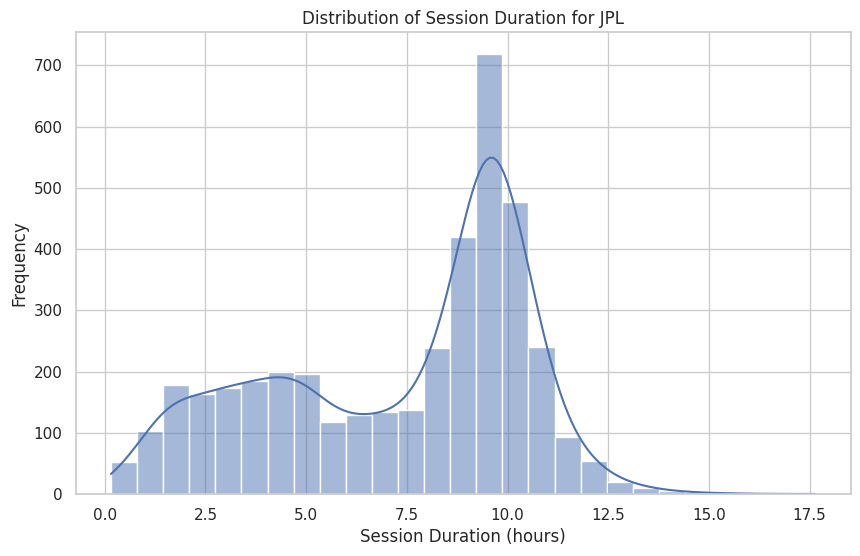

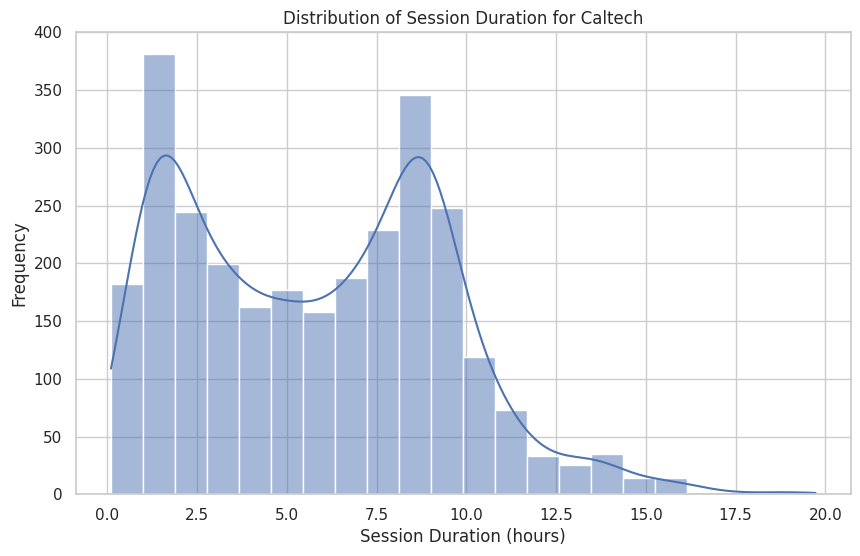

In [ ]:
# Plot for JPL
plt.figure(figsize=(10, 6))
sns.histplot(jpl_df_subset['sessionDuration'], kde=True)
plt.title('Distribution of Session Duration for JPL')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Plot for Caltech
plt.figure(figsize=(10, 6))
sns.histplot(caltech_df_subset['sessionDuration'], kde=True)
plt.title('Distribution of Session Duration for Caltech')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Frequency')
plt.show()

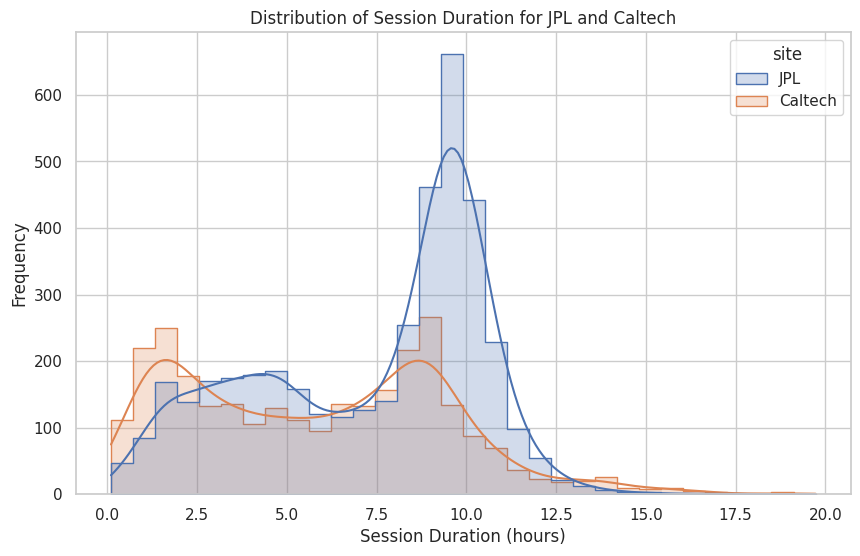

In [ ]:
# Combine the data and add a 'site' column
combined_data = pd.concat([
    jpl_df_subset[['sessionDuration']].assign(site='JPL'),
    caltech_df_subset[['sessionDuration']].assign(site='Caltech')
])

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='sessionDuration', hue='site', kde=True, element='step')
plt.title('Distribution of Session Duration for JPL and Caltech')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def aggregate_halfhourly_sessions(df, time_column, prefix):
    """Aggregates session counts half-hourly based on the specified time column.

    Args:
        df: The Pandas DataFrame to aggregate.
        time_column: The name of the time column ('connectionTime' or 'disconnectTime').
        prefix: A prefix for the session count column name ('c' for connection, 'd' for disconnection).

    Returns:
        A DataFrame with half-hourly aggregated session counts.
    """
    # Half-hourly aggregation
    halfhourly_session_counts = df.groupby([
        pd.Grouper(key=time_column, freq='30min'),
        f'dayOfMonth_{prefix}',
        f'dayOfWeek_{prefix}',
        f'monthOfYear_{prefix}'
    ]).size().reset_index()

    # Rename the '0' column to 'session_count_{prefix}'
    halfhourly_session_counts = halfhourly_session_counts.rename(columns={0: f'session_count_{prefix}'})

    return halfhourly_session_counts

# Apply the function to both DataFrames
jpl_halfhourly_c = aggregate_halfhourly_sessions(jpl_df_subset, 'connectionTime', 'c')
jpl_halfhourly_d = aggregate_halfhourly_sessions(jpl_df_subset, 'disconnectTime', 'd')

caltech_halfhourly_c = aggregate_halfhourly_sessions(caltech_df_subset, 'connectionTime', 'c')
caltech_halfhourly_d = aggregate_halfhourly_sessions(caltech_df_subset, 'disconnectTime', 'd')

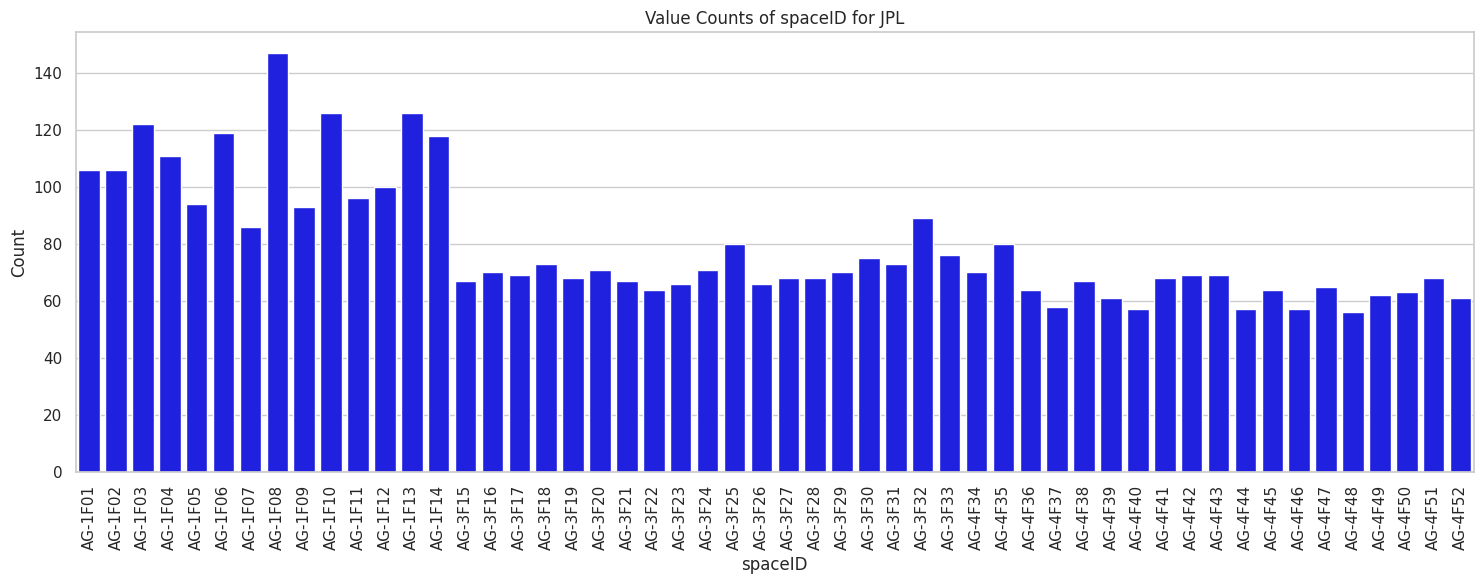

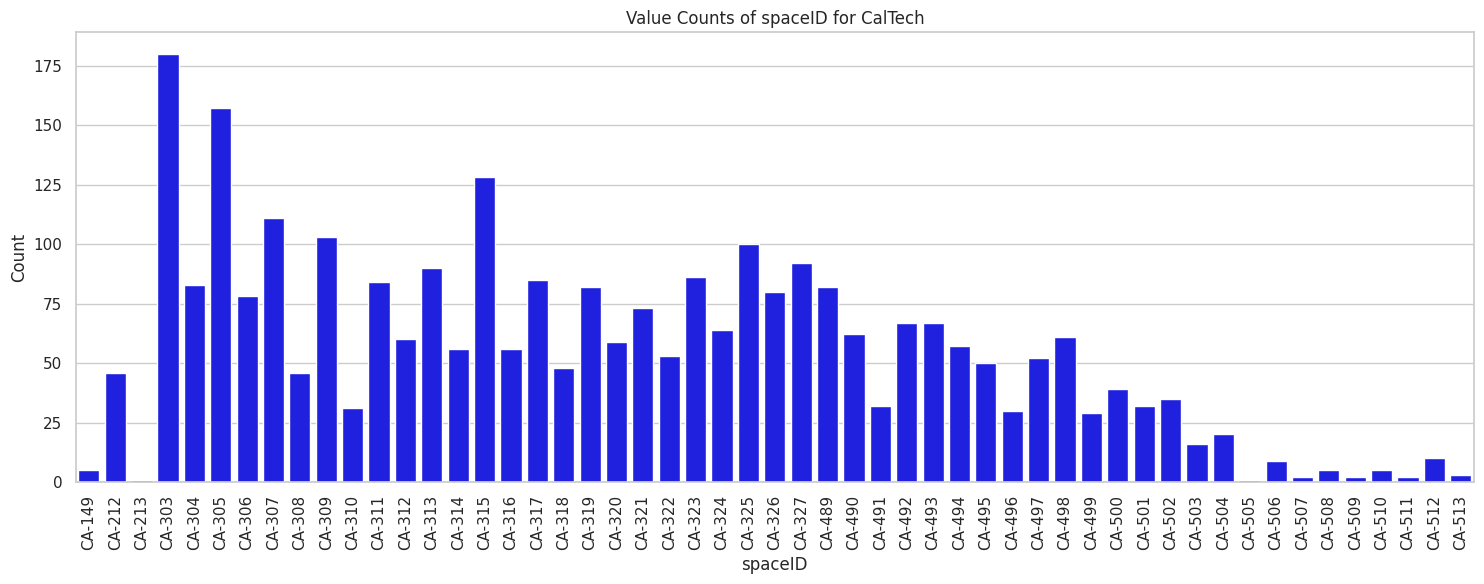

In [ ]:
def plot_space_id_counts(df, title):
  """Generates a bar plot of spaceID value counts for a given DataFrame.

  Args:
    df: The Pandas DataFrame to analyze.
    title: The title for the plot.
  """
  space_id_counts = df['spaceID'].value_counts().sort_index()

  plt.figure(figsize=(15, 6))
  sns.barplot(x=space_id_counts.index, y=space_id_counts.values, color='blue')
  plt.title(title)
  plt.xlabel('spaceID')
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

# Apply the function to both DataFrames
plot_space_id_counts(jpl_df, 'Value Counts of spaceID for JPL')
plot_space_id_counts(caltech_df, 'Value Counts of spaceID for CalTech')

In [ ]:
# Delete irrelevant features
## JPL
jpl_df_subset = jpl_df_subset.drop(columns=['min_kWh', '_id', 'site','kWhDelivered', 'userInputs', 'userID', 'spaceID', 'doneChargingTime', 'sessionID', 'stationID', 'start', 'end', 'timezone', 'clusterID', 'siteID'])

## CalTech
caltech_df_subset = caltech_df_subset.drop(columns=['min_kWh', '_id', 'site','kWhDelivered', 'userInputs', 'userID', 'spaceID', 'doneChargingTime', 'sessionID', 'stationID', 'start', 'end', 'timezone', 'clusterID', 'siteID'])

In [ ]:
caltech_df_subset

,connectionTime,disconnectTime,sessionDuration,hourOfDay_c,dayOfWeek_c,monthOfYear_c,dayOfMonth_c,hourOfDay_d,dayOfWeek_d,monthOfYear_d,dayOfMonth_d
6,2019-01-01 03:45:49,2019-01-01 17:57:23,14.192778,3,1,1,1,17,1,1,1
7,2019-01-01 05:28:34,2019-01-01 06:03:12,0.577222,5,1,1,1,6,1,1,1
8,2019-01-01 17:41:45,2019-01-01 18:39:21,0.960000,17,1,1,1,18,1,1,1
9,2019-01-01 18:09:17,2019-01-02 02:39:32,8.504167,18,1,1,1,2,2,1,2
10,2019-01-01 18:39:25,2019-01-01 19:18:49,0.656667,18,1,1,1,19,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2877,2019-03-31 19:40:43,2019-04-01 02:26:57,6.770556,19,6,3,31,2,0,4,1
2878,2019-03-31 21:16:46,2019-03-31 21:23:08,0.106111,21,6,3,31,21,6,3,31
2879,2019-03-31 23:07:33,2019-03-31 23:46:29,0.648889,23,6,3,31,23,6,3,31
2880,2019-03-31 23:21:59,2019-04-01 01:41:26,2.324167,23,6,3,31,1,0,4,1


In [ ]:
jpl_df_subset

,connectionTime,disconnectTime,sessionDuration,hourOfDay_c,dayOfWeek_c,monthOfYear_c,dayOfMonth_c,hourOfDay_d,dayOfWeek_d,monthOfYear_d,dayOfMonth_d
0,2019-01-02 01:00:51,2019-01-02 02:39:46,1.648611,1,2,1,2,2,2,1,2
1,2019-01-02 13:39:11,2019-01-03 01:19:57,11.679444,13,2,1,2,1,3,1,3
2,2019-01-02 13:44:27,2019-01-02 22:37:33,8.885000,13,2,1,2,22,2,1,2
3,2019-01-02 13:47:38,2019-01-02 19:01:31,5.231389,13,2,1,2,19,2,1,2
4,2019-01-02 13:53:41,2019-01-02 21:40:03,7.772778,13,2,1,2,21,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4054,2019-03-30 18:36:53,2019-03-30 20:20:32,1.727500,18,5,3,30,20,5,3,30
4055,2019-03-30 20:26:19,2019-03-31 03:51:02,7.411944,20,5,3,30,3,6,3,31
4056,2019-03-31 14:48:19,2019-04-01 01:57:50,11.158611,14,6,3,31,1,0,4,1
4057,2019-03-31 18:27:54,2019-03-31 22:47:15,4.322500,18,6,3,31,22,6,3,31


In [ ]:
def save_dataframes(df, halfhourly_c, halfhourly_d, base_path, prefix):
  """Saves the DataFrame and aggregated data to CSV files.

  Args:
    df: The main DataFrame.
    halfhourly_c: The DataFrame with half-hourly connection counts.
    halfhourly_d: The DataFrame with half-hourly disconnection counts.
    base_path: The base directory to save the files.
    prefix: A prefix for the filenames (e.g., 'jpl' or 'caltech').
  """
  filenames = {
      'df': f'{prefix}_final.csv',
      'halfhourly_session_counts_c': f'{prefix}_halfhourly_aggr_c.csv',
      'halfhourly_session_counts_d': f'{prefix}_halfhourly_aggr_d.csv'
  }

  dataframes = {
      'df': df,
      'halfhourly_session_counts_c': halfhourly_c,
      'halfhourly_session_counts_d': halfhourly_d
  }

  for name, dataframe in dataframes.items():
      save_path = os.path.join(base_path, filenames[name])
      dataframe.to_csv(save_path, index=False)

  print(f"All DataFrames for {prefix} saved successfully!")

# Set your base path
base_path = '/content/drive/MyDrive/Colab/NU/CIVE7381/Project/'

# Save JPL data
save_dataframes(jpl_df_subset, jpl_halfhourly_c, jpl_halfhourly_d, base_path, 'jpl')

# Save Caltech data
save_dataframes(caltech_df_subset, caltech_halfhourly_c, caltech_halfhourly_d, base_path, 'caltech')

All DataFrames for jpl saved successfully!
All DataFrames for caltech saved successfully!
